In [1]:
from WIMP_Libraries import *

This WIMP_Libraries includes the "WIMP_Parameters" class as well as functions to calculate WIMP recoil energy spectra

In [2]:
W = WIMP_Parameters()
W.Information()

Detailed information
v0 =  220.0 km/s
vesc =  544.0 km/s
vearth =  232.0 km/s
Target =  Ge
Target_uma =  72.64 uma
Exposure =  1  kg.days
WIMPmass =  100  GeV/c2
CrossSection =  1  pb


One shall not change v0, vesc and vearth.
The user, in principle, is only interested in changing the following values:

In [3]:
W.Exposure = 1 # kg.days
W.WIMPmass = 100 # in GeV/c2
W.CrossSection = 1; #  pb
W.Target = "Ge" #  plenty of targets available : Si, Xe, He, Ar, Ne

The main function is Calculdrder_arrayultimate(ER,W) that takes as arguments

1) an array of energies in eV

2) an object of the WIMP_Parameters class


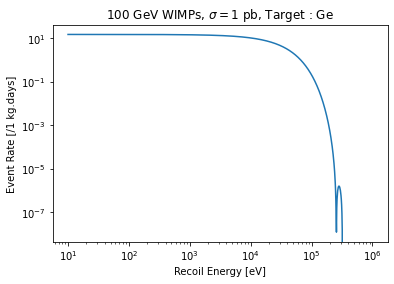

In [4]:
x = np.logspace(1,6,1000)
y = Calculdrder_arrayultimate(x,W)
plt.loglog(x,y,'-')
plt.ylabel(f"Event Rate [/{W.Exposure} kg.days]")
plt.xlabel("Recoil Energy [eV]")
_ = plt.title(f"{W.WIMPmass} GeV WIMPs, $\sigma={W.CrossSection}$ pb, Target : {W.Target}")

Calculdrder_array is basically the same function than Calculdrder_arrayultimate but does not require the use of the class WIMP_Parameters. 
All the informations are directly passed as arguments

In [5]:
WIMPmass = W.WIMPmass
CrossSection = W.CrossSection
A = W.Target_uma
Exposure = W.Exposure
v0 = W.v0
vearth = W.vearth
vesc = W.vesc

y = Calculdrder_array(x,WIMPmass,CrossSection,A,Exposure,v0,vearth,vesc)

Calculdrder shouldn't be used anymore. It is equivalent to Calculdrder_array but does not use numpy at all.
It calculates the event rate for a given energy but can't take as first argument an array of energies.
It is therefore 100 to 1000's times slower.
Below, we compare the execution time of the 3 functions.

0.0601 s with Calculdrder
0.0007 s with Calculdrder_array
0.0007 s with Calculdrder_arrayultimate


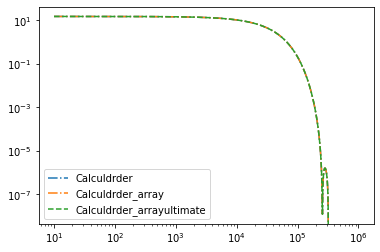

In [6]:

    start = time.time()
    y = [Calculdrder(E,WIMPmass,CrossSection,A,Exposure,v0,vearth,vesc) for E in x]
    end=time.time()
    totaltime = end-start  
    print("{:2.4f}".format(totaltime)+" s with Calculdrder") 
    plt.loglog(x,y,'-.',label='Calculdrder')
    
    start = time.time()
    y2 = Calculdrder_array(x,WIMPmass,CrossSection,A,Exposure,v0,vearth,vesc)
    end=time.time()
    totaltime = end-start  
    print("{:2.4f}".format(totaltime)+" s with Calculdrder_array") 
    plt.loglog(x,y2,'-.',label='Calculdrder_array')
    
    start = time.time()
    y3 = Calculdrder_arrayultimate(x,W)
    end=time.time()
    totaltime = end-start  
    print("{:2.4f}".format(totaltime)+" s with Calculdrder_arrayultimate") 
    plt.loglog(x,y2,'--',label='Calculdrder_arrayultimate')
    _ = plt.legend()

Because of the huge difference in computation time, Calculdrder_arrayultimate and Calculdrder_array are the only functions that should be used.
Still I suggest only using Calculdrder_arrayultimate which makes use of the WIMP_Parameters class.

And finally, here is the kind of fancy plot you can do when overlapping a large number of recoil energy spectra of different masses, which is only made possible by the fast computing time of numpy : 

execution time for 500 recoil energy spectra with 1000 pts each: 1.44 seconds


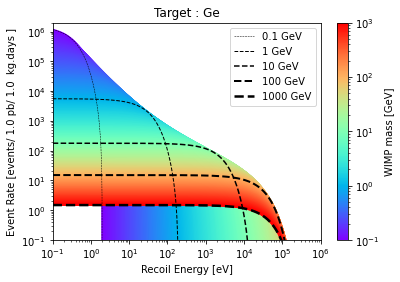

In [13]:
    emin, emax, nvals = 1e-1, 1e6, 1000
    x = np.logspace(np.log10(emin),np.log10(emax),nvals)
    W = WIMP_Parameters()
    W.Exposure=1 # kg.days
    #W.WIMPmass=100 # in GeV/c
    W.CrossSection=1; #  pb
    W.Target = "Ge"
    
    #W.Information()
    start = time.time()
    massmin = 0.1
    massmax = 1e3
    npts=500
    
    #plt.figure(figsize=(16,9),constrained_layout=True)
    masses = np.logspace(np.log10(massmin),np.log10(massmax),npts)
    normalize = mcolors.LogNorm(vmin=massmin, vmax=massmax)
    colormap = cm.rainbow
    for i,m in enumerate(masses):
        W.WIMPmass=m
        y =  Calculdrder_arrayultimate(x,W)
        plt.loglog(x,y,'-',color=colormap(normalize(m)))
    plt.xlabel('Recoil Energy [eV]')
    title = "Event Rate [events/ {:2.1f} pb".format(W.CrossSection)
    title += "/ {:2.1f}  kg.days ]".format(W.Exposure)
    plt.ylabel(title)
    plt.title("Target : "+str(W.Target))
    
    # colorbar code
    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(npts)
    cbar = plt.colorbar(scalarmappaple)
    cbar.set_label('WIMP mass [GeV]')
    
    individualmasses = [0.1,1,10,100,1000]
    lws = [0.5,1,1.5,2,2.5]
    for i,m in enumerate(individualmasses):
        W.WIMPmass=m
        y =  Calculdrder_arrayultimate(x,W)
        plt.loglog(x,y,'--',color="black",label=str(m)+ " GeV",lw=lws[i])
    plt.ylim(1e-1,2e6)
    plt.xlim(emin,emax)
    end = time.time()
    print(f"execution time for {npts} recoil energy spectra with {nvals} pts each: {end-start:.2f} seconds")
    plt.legend()
    plt.show()   